## PROBLEM STATEMENT (<250 words)

In this paper, we aim to use visual analytical approaches to analyse patterns and trends in crime data of San Francisco. As crime events are increasing over time, resulting in massive crime datasets. It is worthwhile to analyse crime patterns in order to get useful insights from the data. Our work is mainly concerned in:
- Time
    - How does crime vary over time?
        • Over the year
        • Over the week
        • Over a day
- Space
    - In which districts are there most crimes? Are there any crime hotspots?
- Spatio-temporal
    - Do crime hotspots vary over time?
- Types of crime
    - Are there any striking differences between different types of crimes in terms of:
        – Where and where they occur?
- Temporal correlation
    - How highly correlated are different types of crime temporally?
- Prediction
    - How well can crime rates be predicted?


This data was collected between the years 1/1/2003 to 5/13/2015. It has a 878,049 number of observations and 9 attributes describing the recorded crimes. The attributes in data gives us information about districts where the crime occurred, the actual type of crime and the time and day of the crime. We have spatial coordinates longitude and latitude which allows us to plot exact location of the crime on the map of San Francisco.


The data has 2,323 duplicated records which have been removed. After removing duplicated rows, the dataset is left with 875,726 number of rows. There are three nominal categorical variables which are called “Category”, “District”, and “Day of week”. New features  extracted from timestamp variable are month, year ,date, hour and minute.



# Data Visualization with Plotly: Street Robberies in San Francisco

In [1]:
import plotly
import chart_studio.plotly as py
import chart_studio
chart_studio.tools.set_credentials_file(username='adammahmood', api_key='1ELCJp6I7UFB1TqMq4a9')

import plotly.graph_objs as go
from plotly.tools import make_subplots

# Data exploration
import pandas as pd

# Numerical
import numpy as np

# Spatial analysis
import geopandas as gpd   # used to read .shp file
import matplotlib.pyplot as plt
import folium as fm
import seaborn as sns
from shapely.geometry import Point, Polygon, shape

In [2]:
file_2003_2018 = "Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"

#read file without Location column
PD_Recs_2003_2018 = pd.read_csv(file_2003_2018)


In [3]:
PD_Recs_2003_2018=PD_Recs_2003_2018.drop(
    ['Location', 'PdId'],1)

In [4]:
PD_Recs_2003_2018.head(10)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000
5,40855122,SUICIDE,SUICIDE BY JUMPING,Tuesday,07/27/2004,15:19,SOUTHERN,NONE,500 Block of I-80,-122.386667,37.789882
6,66085191,NON-CRIMINAL,LOST PROPERTY,Sunday,11/19/2006,17:45,BAYVIEW,NONE,0 Block of GIANTS DR,-122.387501,37.716879
7,50908404,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,08/13/2005,17:00,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.500000,90.000000
8,90768064,ARSON,ARSON OF A VEHICLE,Tuesday,07/28/2009,23:26,BAYVIEW,NONE,SELBY ST / OAKDALE AV,-122.399686,37.739902
9,111027676,ASSAULT,BATTERY,Saturday,12/24/2011,07:00,SOUTHERN,NONE,0 Block of DORE ST,-122.412933,37.773927


In [5]:
PD_Recs_2003_2018['Date_Time'] = PD_Recs_2003_2018['Date'] + ' ' + PD_Recs_2003_2018['Time']

PD_Recs_2003_2018['Date_Time'] = pd.to_datetime(PD_Recs_2003_2018['Date_Time'],format="%m/%d/%Y %H:%M")
#specifying format vastly improves the speed!

PD_Recs_2003_2018 = PD_Recs_2003_2018.drop(['Date', 'Time'],axis=1)

In [6]:
def date_time(data):
    data['Year'] = data['Date_Time'].dt.year
    data['Month'] = data['Date_Time'].dt.month
    data['Day'] = data['Date_Time'].dt.day
    data['Hour'] = data['Date_Time'].dt.hour
    data['Day Of Week'] = data['Date_Time'].dt.dayofweek
    return data


In [7]:
date_time(PD_Recs_2003_2018)

,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date_Time,Year,Month,Day,Hour,Day Of Week
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2014-09-23 01:00:00,2014,9,23,1,1
1,150045675,ASSAULT,BATTERY,Thursday,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,2015-01-15 17:00:00,2015,1,15,17,3
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,2014-07-30 09:32:00,2014,7,30,9,2
3,150383259,ASSAULT,BATTERY,Saturday,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,2015-05-02 23:10:00,2015,5,2,23,5
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,2004-07-02 13:43:00,2004,7,2,13,4
5,40855122,SUICIDE,SUICIDE BY JUMPING,Tuesday,SOUTHERN,NONE,500 Block of I-80,-122.386667,37.789882,2004-07-27 15:19:00,2004,7,27,15,1
6,66085191,NON-CRIMINAL,LOST PROPERTY,Sunday,BAYVIEW,NONE,0 Block of GIANTS DR,-122.387501,37.716879,2006-11-19 17:45:00,2006,11,19,17,6
7,50908404,VEHICLE THEFT,STOLEN AUTOMOBILE,Saturday,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.500000,90.000000,2005-08-13 17:00:00,2005,8,13,17,5
8,90768064,ARSON,ARSON OF A VEHICLE,Tuesday,BAYVIEW,NONE,SELBY ST / OAKDALE AV,-122.399686,37.739902,2009-07-28 23:26:00,2009,7,28,23,1
9,111027676,ASSAULT,BATTERY,Saturday,SOUTHERN,NONE,0 Block of DORE ST,-122.412933,37.773927,2011-12-24 07:00:00,2011,12,24,7,5


In [8]:
PD_Recs_2003_2017 = PD_Recs_2003_2018[PD_Recs_2003_2018['Year']<2018]

# Prepare Geographic Data 

In [9]:
nhood_map = gpd.read_file('Neighborhoods/geo_export_440989e3-5908-49cd-81c2-c3d23839267a.shp')

# Convert PD_Recs_2003_2017 to a GeoDataFrame
PD_Recs_2003_2017['Coords'] = PD_Recs_2003_2017[['X','Y']].apply(tuple,axis=1).apply(Point)
PD_Recs_2003_2017 = gpd.GeoDataFrame(PD_Recs_2003_2017,geometry='Coords')

C:\Users\admahmoo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
# Locate the neighborhoods of each incident by merging the two dataframes. 
PD_Recs_2003_2017.crs = nhood_map.crs
PD_Recs_2003_2017_nhood_map = gpd.sjoin(nhood_map,PD_Recs_2003_2017)

In [11]:
PD_Recs_2003_2017_nhood_map.head()

,nhood,geometry,index_right,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date_Time,Year,Month,Day,Hour,Day Of Week
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7...",1247285,130921255,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Wednesday,BAYVIEW,"ARREST, CITED",100 Block of CARGO WY,-122.380130,37.741918,2013-10-30 09:51:00,2013,10,30,9,2
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7...",1940727,160545687,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,BAYVIEW,NONE,0 Block of CARGO WY,-122.379952,37.742103,2016-07-03 20:08:00,2016,7,3,20,6
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7...",2030952,160095864,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,BAYVIEW,NONE,0 Block of CARGO WY,-122.379952,37.742103,2016-01-29 15:30:00,2016,1,29,15,4
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7...",1921803,160230145,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Thursday,BAYVIEW,NONE,0 Block of CARGO WY,-122.379952,37.742103,2016-03-03 12:00:00,2016,3,3,12,3
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7...",2033589,171054114,NON-CRIMINAL,FOUND PROPERTY,Sunday,BAYVIEW,NONE,0 Block of CARGO WY,-122.379952,37.742103,2017-12-31 01:40:00,2017,12,31,1,6


# Neighborhood wise mapping of all crimes

In [12]:
nhood_incidents_all = PD_Recs_2003_2017_nhood_map.nhood.value_counts()
nhood_map = nhood_map.merge(nhood_incidents_all.to_frame('Incidents_All'), left_on = 'nhood',right_index = True)
abbreviations = ['Bayview', 'Brnl', 'Castro', 'ChTwn', 'Exclsr', 'FinDist', 'GlenPark', 'InRich', 'ggPark', 'Haight', 'Hayes', 'In_Sun', 'JpTwn', 'McLrn', 'TndrLn', 'LakeSh', 'Lncln', 'USF', 'Marina', 'Rus_Hill', 'Mission', 'MisBay', 'Nob','SeaClf', 'Noe', 'N_Beach', 'Inglsde', 'SoMA', 'Sunset/Parkside', 'Out_Mis', 'Out_Rich', 'Pcfc_Hts', 'Prtl', 'Potrero Hill', 'Presidio', 'Prsd_Hts' , 'T_Isl', 'TwinPks', 'V_Val','WoTP', 'W_Add']    
nhood_map['abbr'] = abbreviations

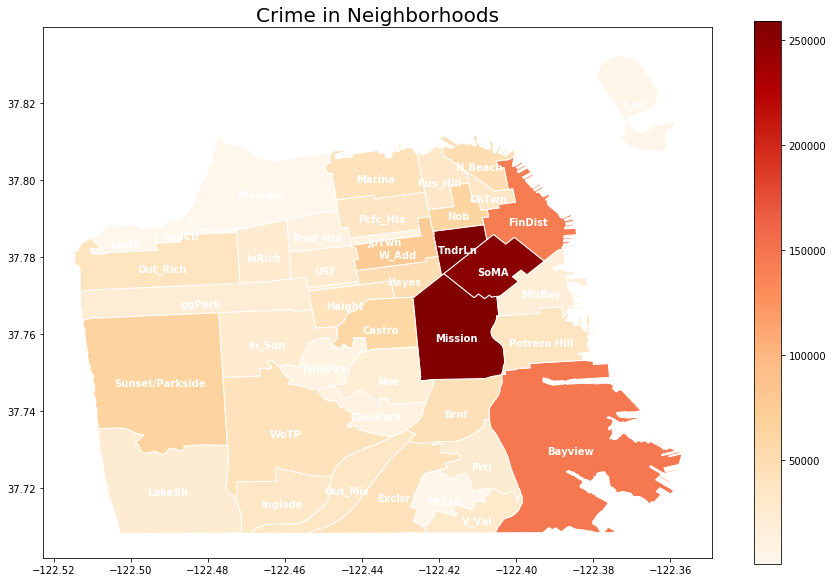

In [13]:
ax = nhood_map.plot(column = 'Incidents_All',figsize=(15,10),legend =True,linewidth=1,edgecolor='white', cmap='OrRd')
ax.axis('on')

ax.set_title('Crime in Neighborhoods',fontsize=20,color='black')
for i in nhood_map.index:
    coords = nhood_map.geometry[i].centroid.coords[0]
    ax.annotate(s = nhood_map['abbr'][i], xy = coords,horizontalalignment='center',verticalalignment='top' ,color='white',fontweight='heavy')

ax
plt.savefig('Crimes_Nhood.png',transparent=True)

# Police District wise mapping of Crime 

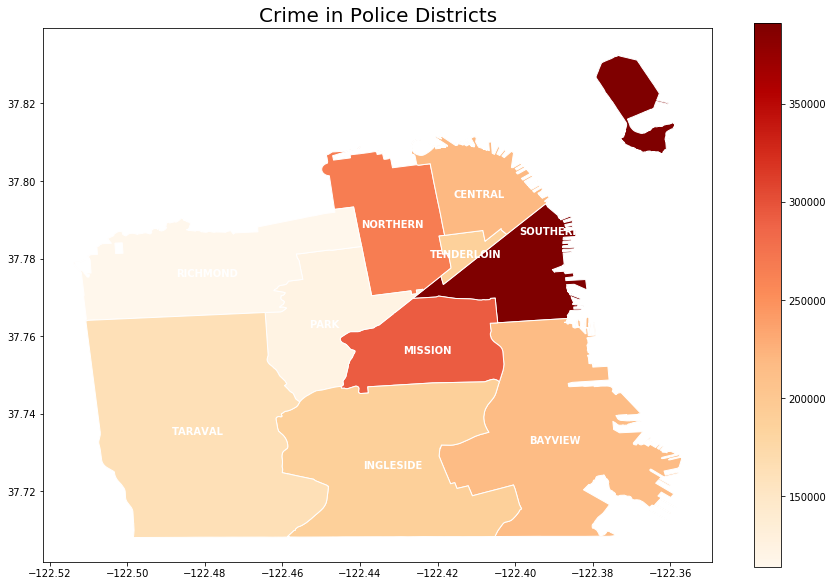

In [14]:
#police district shapefile
police_districts =  gpd.read_file('Current Police Districts/geo_export_47e899db-fd66-4dbc-989e-07ef29421673.shp')
pd_geom = police_districts.set_index('district')

pd_incidents = PD_Recs_2003_2017_nhood_map.PdDistrict.value_counts()
pd_geom = pd_geom.merge(pd_incidents.to_frame('Incidents'), left_index=True, right_index=True)

axx = pd_geom.plot(column = 'Incidents',figsize=(15,10),legend =True,linewidth=1,edgecolor='white', cmap='OrRd')
axx.axis('on')

axx.set_title('Crime in Police Districts',fontsize=20,color='black')
for i in pd_geom.index:
    coords = pd_geom.geometry[i].centroid.coords[0]
    axx.annotate(s = i, xy = coords,horizontalalignment='center',verticalalignment='top' ,color='white',fontweight='heavy')

plt.savefig('Crime_PdD.png',transparent=True)

# Monthly Crime Variation Per Category

In [23]:
crimes_per_month = PD_Recs_2003_2017_nhood_map.set_index('Date_Time').groupby([pd.Grouper(freq='m'),'Category'])['Month'].count().unstack().fillna(0)
crimes_per_month

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Date_Time,,,,,,,,,,,,,,,,,,,,,
2003-01-31,23.0,1171.0,9.0,4.0,492.0,85.0,31.0,1005.0,76.0,28.0,...,2.0,67.0,7.0,361.0,0.0,154.0,562.0,1136.0,869.0,118.0
2003-02-28,17.0,1050.0,6.0,2.0,451.0,72.0,26.0,925.0,63.0,21.0,...,6.0,54.0,10.0,380.0,0.0,98.0,483.0,1086.0,775.0,122.0
2003-03-31,22.0,1231.0,14.0,2.0,562.0,89.0,20.0,695.0,56.0,19.0,...,3.0,76.0,7.0,354.0,0.0,124.0,619.0,1412.0,712.0,112.0
2003-04-30,15.0,1015.0,14.0,2.0,557.0,67.0,25.0,908.0,56.0,31.0,...,3.0,67.0,5.0,314.0,0.0,135.0,540.0,1444.0,779.0,109.0
2003-05-31,29.0,1116.0,11.0,0.0,584.0,70.0,28.0,862.0,61.0,21.0,...,3.0,61.0,8.0,374.0,0.0,124.0,524.0,1298.0,772.0,91.0
2003-06-30,32.0,1060.0,12.0,1.0,457.0,57.0,12.0,749.0,51.0,14.0,...,3.0,71.0,7.0,317.0,0.0,119.0,569.0,1219.0,687.0,86.0
2003-07-31,40.0,1109.0,9.0,2.0,458.0,76.0,24.0,795.0,60.0,19.0,...,0.0,79.0,9.0,338.0,0.0,102.0,547.0,1261.0,792.0,75.0
2003-08-31,18.0,1139.0,13.0,3.0,488.0,64.0,22.0,868.0,40.0,13.0,...,2.0,70.0,8.0,363.0,0.0,94.0,573.0,1407.0,826.0,108.0
2003-09-30,23.0,1235.0,9.0,3.0,441.0,94.0,24.0,843.0,43.0,21.0,...,3.0,74.0,9.0,387.0,0.0,133.0,501.0,1376.0,826.0,112.0


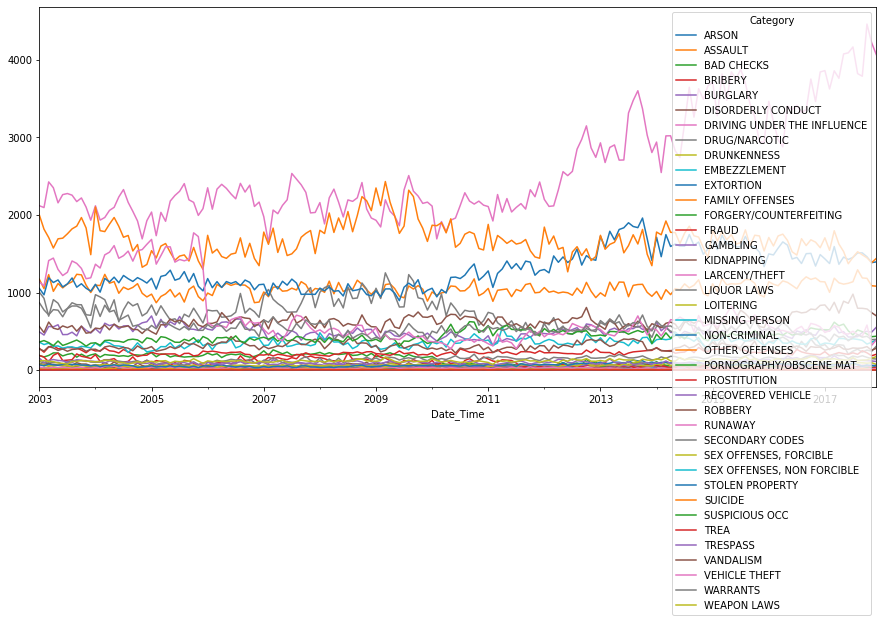

In [24]:
fig,ax = plt.subplots(figsize=(15,7))
crimes_per_month.plot(ax=ax)

# Yearly Crime Variation Per Category

In [25]:
#fig,ax = plt.subplots(figsize=(15,7))
crimes_per_year = PD_Recs_2003_2017_nhood_map.set_index('Date_Time').groupby([pd.Grouper(freq='y'),'Category'])['Year'].count().unstack()
crimes_per_year

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Date_Time,,,,,,,,,,,,,,,,,,,,,
2003-12-31,293.0,13450.0,134.0,28.0,6046.0,886.0,289.0,9911.0,662.0,240.0,...,28.0,799.0,93.0,4195.0,NaN,1434.0,6445.0,15318.0,9069.0,1281.0
2004-12-31,279.0,12891.0,79.0,39.0,6750.0,812.0,244.0,9891.0,600.0,201.0,...,31.0,640.0,100.0,4483.0,NaN,1190.0,6493.0,17863.0,8109.0,1251.0
2005-12-31,231.0,11593.0,101.0,38.0,7067.0,687.0,196.0,8529.0,635.0,197.0,...,24.0,537.0,79.0,4691.0,NaN,1033.0,7012.0,18176.0,6695.0,1339.0
2006-12-31,240.0,12441.0,87.0,36.0,7002.0,521.0,264.0,9067.0,703.0,229.0,...,29.0,575.0,86.0,4773.0,NaN,1102.0,7687.0,7285.0,6497.0,1323.0
2007-12-31,246.0,12514.0,69.0,56.0,5453.0,581.0,313.0,10560.0,671.0,269.0,...,39.0,527.0,111.0,4798.0,NaN,1198.0,7560.0,6458.0,7103.0,1318.0
2008-12-31,248.0,12672.0,78.0,49.0,5677.0,789.0,408.0,11648.0,710.0,242.0,...,20.0,517.0,100.0,4749.0,NaN,1150.0,7339.0,6049.0,5798.0,1419.0
2009-12-31,222.0,12273.0,64.0,46.0,5379.0,956.0,579.0,11946.0,804.0,214.0,...,17.0,660.0,83.0,4625.0,NaN,1232.0,7599.0,5182.0,5760.0,1431.0
2010-12-31,209.0,12384.0,54.0,61.0,4965.0,827.0,458.0,9204.0,706.0,155.0,...,30.0,680.0,82.0,6000.0,2.0,1150.0,7931.0,4341.0,6183.0,1348.0
2011-12-31,203.0,12273.0,45.0,47.0,4987.0,762.0,470.0,6931.0,652.0,168.0,...,29.0,779.0,76.0,6203.0,NaN,1072.0,7239.0,4761.0,6305.0,1328.0


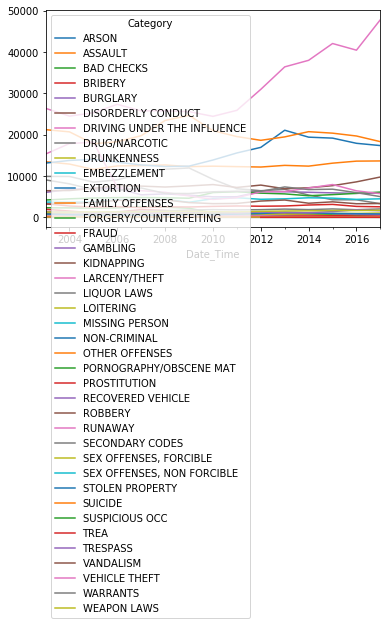

In [27]:
crimes_per_year.plot()
plt.show()

# Day of the week Crime Variation Per Category

In [33]:
#fig,ax = plt.subplots(figsize=(15,7))
crimes_per_each_day_of_week = PD_Recs_2003_2017_nhood_map.set_index('Date_Time').groupby(['DayOfWeek','Category'])['Category'].count().unstack().fillna(0)
crimes_per_each_day_of_week

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,551.0,27686.0,137.0,117.0,15237.0,1221.0,858.0,16235.0,1423.0,499.0,...,51.0,1616.0,177.0,12128.0,2.0,2706.0,18020.0,19879.0,14008.0,3284.0
Monday,565.0,26020.0,151.0,107.0,12777.0,1472.0,629.0,16712.0,1183.0,509.0,...,63.0,1683.0,203.0,11297.0,5.0,2764.0,15032.0,17080.0,13802.0,3009.0
Saturday,538.0,29615.0,97.0,116.0,11670.0,1383.0,1143.0,14142.0,1835.0,368.0,...,58.0,1544.0,194.0,10536.0,2.0,2421.0,18355.0,18687.0,12602.0,3086.0
Sunday,541.0,29709.0,53.0,123.0,10530.0,1283.0,1111.0,13373.0,1893.0,284.0,...,46.0,1550.0,171.0,10187.0,0.0,2361.0,16860.0,17502.0,12343.0,2841.0
Thursday,551.0,25342.0,157.0,116.0,13216.0,1436.0,682.0,18328.0,1139.0,427.0,...,75.0,1663.0,178.0,11463.0,2.0,2727.0,15033.0,17397.0,15093.0,3053.0
Tuesday,572.0,25693.0,165.0,105.0,12870.0,1557.0,582.0,18915.0,1095.0,420.0,...,72.0,1770.0,178.0,11280.0,2.0,2946.0,14794.0,16983.0,15432.0,3055.0
Wednesday,515.0,25934.0,156.0,112.0,13127.0,1591.0,573.0,20409.0,1172.0,434.0,...,55.0,1789.0,171.0,11807.0,1.0,3003.0,15122.0,17514.0,16420.0,3270.0


In [37]:
PD_Recs_2003_2017_nhood_map[(PD_Recs_2003_2017_nhood_map.Category == 'ARSON') & (PD_Recs_2003_2017_nhood_map.DayOfWeek == 'Friday') ].shape

(551, 18)

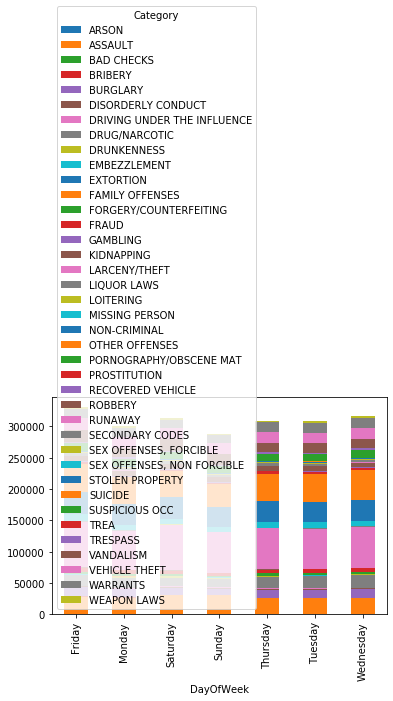

In [29]:
crimes_per_each_day_of_week.plot(kind='bar',stacked=True)

# Focus On street robberies

In [62]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Subplots")
fig.show()
categories = PD_Recs_2003_2017_nhood_map['Category'].unique()
data = []
for category in categories:
    crime = PD_Recs_2003_2017_nhood_map[(PD_Recs_2003_2017_nhood_map['Category']==category)]
    per_month = crime.set_index('Date_Time').groupby(pd.Grouper(freq='m'))['Month'].count()
    x = per_month.index
    y = per_month

    freq_monthly = go.Scatter( x = x,y = y,line= dict(width=1,shape='spline',smoothing=1.3),mode = 'lines+markers',marker= dict(size= 1,symbol='square',
        color= 'rgb(26, 26, 26)',
        opacity= 0.3),
        name = category )

    data += [freq_monthly]
layout = go.Layout(
    title = 'Monthly Frequencies of Crime',
    plot_bgcolor = 'rgb(248, 248, 248)',
    paper_bgcolor='rgb(254, 254, 254)',
    #legend=dict(orientation='h'),
    dragmode = 'zoom',
    width=1000,
)

fig = go.Figure(data=data, layout = layout)

py.iplot(fig)

In [48]:

#Monthly Frequency of Street Robberies 
per_month = street_robs.set_index('Date_Time').groupby(pd.Grouper(freq='m'))['Month'].count()
x = per_month.index
y = per_month

freq_monthly = go.Scatter( x = x,y = y,line= dict(width=1,shape='spline',smoothing=1.3),mode = 'lines+markers',marker= dict(size= 1,symbol='square',
    color= 'rgb(26, 26, 26)',
    opacity= 0.3),
    name = 'Monthly' )

data = [freq_monthly]

layout = go.Layout(
    title = 'Monthly Frequencies of Street Robberies',
    plot_bgcolor = 'rgb(248, 248, 248)',
    paper_bgcolor='rgb(254, 254, 254)',
    #legend=dict(orientation='h'),
    dragmode = 'zoom',
    width=1000,
)

fig = go.Figure(data=data, layout = layout)

py.iplot(fig)

# Neighborhood wise mapping of street robberies

In [40]:
nhood_incidents_street_robs = street_robs.nhood.value_counts()
nhood_map = nhood_map.merge(nhood_incidents_street_robs.to_frame('Incidents_Street_Robs'), left_on = 'nhood',right_index = True)

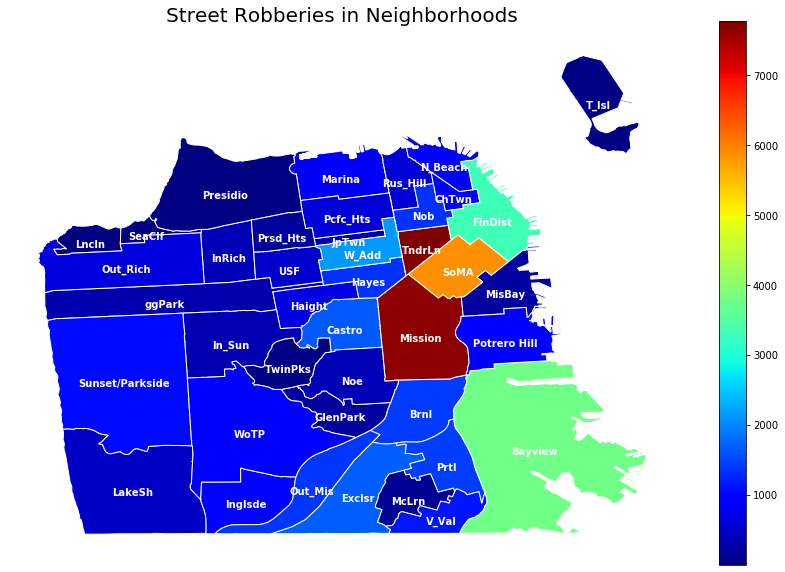

In [41]:
axx = nhood_map.plot(column = 'Incidents_Street_Robs', cmap='jet',figsize=(15,10),legend =True,linewidth=1,edgecolor='white')
axx.axis('off')
#axx.legend(title='Incidents',fontsize=20)
axx.set_title('Street Robberies in Neighborhoods',fontsize=20,color='black')
for i in nhood_map.index:
    coords = nhood_map.geometry[i].centroid.coords[0]
    axx.annotate(s = nhood_map['abbr'][i], xy = coords,horizontalalignment='center',verticalalignment='top' ,color='white',fontweight='heavy')

plt.savefig('Robberies_Nhood.png',transparent=True)

# Methods of Street Robberies

In [42]:
# Methods of Street Robberies
methods = street_robs['Descript'].value_counts()
method_labels = methods.index
method_values = methods

pie_methods = go.Pie(labels = method_labels, values = method_values,hoverinfo = 'label+percent',
                     textinfo = 'value',hole=0.67,rotation=160)

data = [pie_methods]

layout = go.Layout(
    #height = 1000,
    showlegend=False,
    title = dict(text='Methods of <br> Street Robberies',x=0.5,y=0.5,font=dict(size=23))
)

fig = go.Figure(data,layout=layout)

py.iplot(fig)

# Spatial distribution of incidents

 To get a spatial sense of these incidents, we'll plot them on a map using the MapBox Plugin. 

In [43]:
# Generate an access token for this project 
mapbox_access_token  = 'pk.eyJ1IjoibmF2bW9oYW4iLCJhIjoiY2p0bmZvYWN1MHgzbzQzcGVxY3FxbnFnbCJ9.bguGCD3m6L1HXWc9DR7ycQ'

data = []

years = np.sort(pd.unique(street_robs['Year']))
for i in range(len(years)):
    datapoints = street_robs[street_robs['Year']==years[i]]
    trace = go.Scattermapbox(
        lat = datapoints['Y'],
        lon = datapoints['X'],
        #mode = 'lines+markers',
        #text = [str(k) for k in range(len(dataseg))],
        name = str(datapoints['Year'].iloc[0]),
        marker = go.scattermapbox.Marker(size = 10,opacity = 0.7),
        text = datapoints[['Date_Time','Descript']]
    )
    data.append(trace)


layout = go.Layout(
    title = ' Annual Incidence of Street Robberies',
    width = 1000,
    height = 1000,
    #traceorder = 'normal',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        #bearing=-50,
        #pitch = 50,
        zoom=12,
        center=go.layout.mapbox.Center(
            lat=37.75,
            lon=-122.44,
        ),
        style='mapbox://styles/mihalw28/cjlz6bzrv697i2rpec2yqartr'
    ),
)


fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

PlotlyRequestError: This file is too big! Your current subscription is limited to 524.288 KB uploads. For more information, please visit: https://go.plot.ly/get-pricing.

# Hourly/Daily/Monthly distributions across NHoods

In [44]:
nhoods = pd.unique(street_robs['nhood'])
data = []
months = {1:'JAN', 2:'FEB', 3:'MARCH', 4:'APR', 5:'MAY', 6:'JUNE', 7:'JULY', 8:'AUG', 9:'SEPT', 10:'OCT', 11:'NOV', 12:'DEC'}
for i in range(len(nhoods)):
    nhood_Months = street_robs[street_robs['nhood']==nhoods[i]]['Month'].value_counts().reset_index().rename(columns={'index':'month','Month':'incidents'}).sort_values(by='month')
    trace = go.Bar(
        x = nhood_Months.month.map(months),
        y = nhood_Months.incidents,
        opacity = 0.6,
        name = nhoods[i],
        #marker = dict(color=color_nhoods[i])
        
    )
    data.append(trace)

layout = go.Layout(
    title = 'MONTHLY INCIDENCE OF STREET ROBBERIES',
    barmode = 'stack'

)

fig = go.Figure(data,layout)

py.iplot(fig)

In [45]:
Nhoods = pd.unique(street_robs['nhood'])
days = {0:'MON',1:'TUE',2:'WED',3:'THUR',4:'FRI',5:'SAT',6:'SUN'}
data = []
for i in range(len(Nhoods)):
    trace = go.Histogram(
        x = street_robs[street_robs['nhood']==Nhoods[i]].sort_values('Day Of Week')['Day Of Week'].map(days),
        opacity = 0.6,
        name = Nhoods[i],
        #marker = dict(color=color_Nhoods[i])
        
    )
    data.append(trace)

layout = go.Layout(
    title = 'DAILY INCIDENCE OF STREET ROBBERIES',
    barmode = 'stack'

)

fig = go.Figure(data,layout)
py.iplot(fig)

In [46]:
Nhoods = pd.unique(street_robs['nhood'])
data = []
for i in range(len(Nhoods)):
    Nhood_Hours = street_robs[street_robs['nhood']==Nhoods[i]]['Hour'].value_counts()
    trace = go.Bar(
        x = Nhood_Hours.index,
        y = Nhood_Hours,
        opacity = 0.8,
        name = Nhoods[i],
        #marker = dict(color=color_Nhoods[i])
        
    )
    data.append(trace)

layout = go.Layout(
    title = 'HOURLY INCIDENCE OF STREET ROBBERIES',
    barmode = 'stack',
    xaxis = dict(dtick=1)
    )

fig = go.Figure(data,layout)

#use iplot for in notebook plot. 
#use plot for loading onto your plotly user account

py.iplot(fig)
#py.plot(fig)

# Temporal heat map of Street Robberies

In [47]:
years = np.sort(pd.unique(street_robs['Year']))
data = []
days = {0:'MON',1:'TUE',2:'WED',3:'THUR',4:'FRI',5:'SAT',6:'SUN'}

for i in years:
    datapoints= street_robs[street_robs['Year']==i].sort_values(by='Day Of Week')
    trace = go.Histogram2dContour(
        x = datapoints['Hour'],
        y = datapoints['Day Of Week'].map(days),
        name = str(i),
        contours = dict(coloring='fill',showlines=False,),
        ncontours = 8,
        zmin=0,zmax=130,
    )
    data.append(trace)

steps = []
for i in range(len(data)):
    year = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = str(years[i])
    )
    year['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(year)

sliders = [dict(
    active = 2013,
    currentvalue = {"prefix": "Year: "},
    pad = {"t": 50},
    steps = steps,
    yanchor = 'top'
)]

layout = go.Layout(
    sliders = sliders,
    title = 'Street robberies over the years',
    xaxis = dict(range=[0,24]),
    yaxis = dict(range=[0,6]),
    width = 800,
    height = 600,
    hovermode = 'x',
)


fig = go.Figure(data,layout=layout)
py.iplot(fig)

PlotlyRequestError: This file is too big! Your current subscription is limited to 524.288 KB uploads. For more information, please visit: https://go.plot.ly/get-pricing.